In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from summarizer.data import Catalogue
from summarizer.two_point import TPCF 
from summarizer.vpf import VPF 
from summarizer.cic import CiC 

In [2]:
cat = Catalogue.from_quijote(
    node=0,
    redshift=0.5,
    path_to_lhcs= Path('/n/holystore01/LABS/itc_lab/Users/ccuestalazaro/quijote/latin_hypercube'),
)

In [14]:
cic_summarizer = CiC(r_max=30.,num_pN=20, n_bins=30, n_spheres=10000,)
cic= cic_summarizer(cat)
cic = cic_summarizer.to_dataset(cic)

/n/home11/ccuestalazaro/tmp/ipykernel_228569/598395463.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cic.r, np.log10(cic.sel(N=N).values),


Text(0, 0.5, 'log CiC')

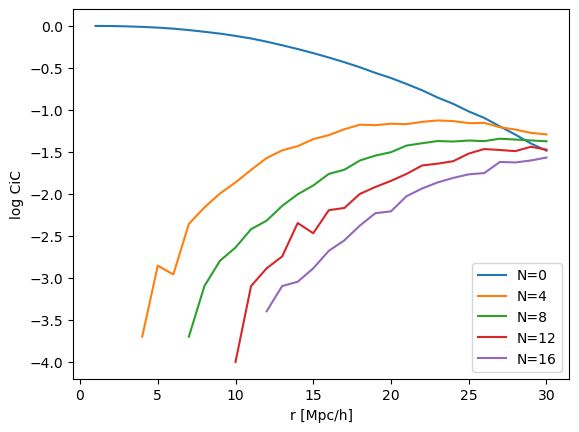

In [15]:
for N in range(0,20,4):
    plt.plot(cic.r, np.log10(cic.sel(N=N).values),
             label=f'N={N}')
plt.legend()
plt.xlabel('r [Mpc/h]')
plt.ylabel('log CiC')

In [16]:
cic.r[10]

<xarray.DataArray 'r' ()>
array(11.)
Coordinates:
    r        float64 11.0

In [21]:
float(cic.r[rbin])

6.0

/n/home11/ccuestalazaro/tmp/ipykernel_228569/3011193314.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cic.N, np.log10(cic.sel(r=cic.r[rbin]).values),


Text(0, 0.5, 'log CiC')

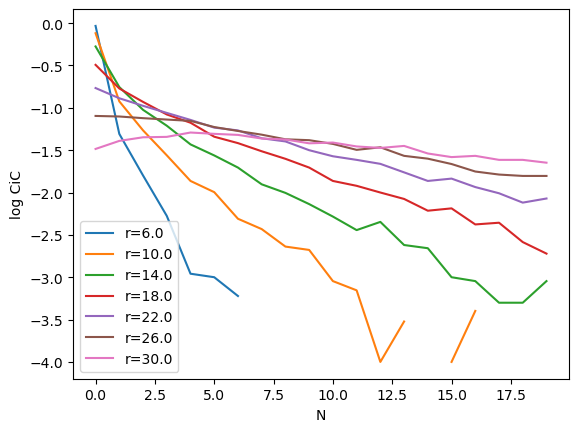

In [22]:
for rbin in range(5,30,4):
    plt.plot(cic.N, np.log10(cic.sel(r=cic.r[rbin]).values),
             label=f'r={float(cic.r[rbin])}')
plt.legend()
plt.xlabel('N')
plt.ylabel('log CiC')

Text(0, 0.5, '$\\xi(R)$')

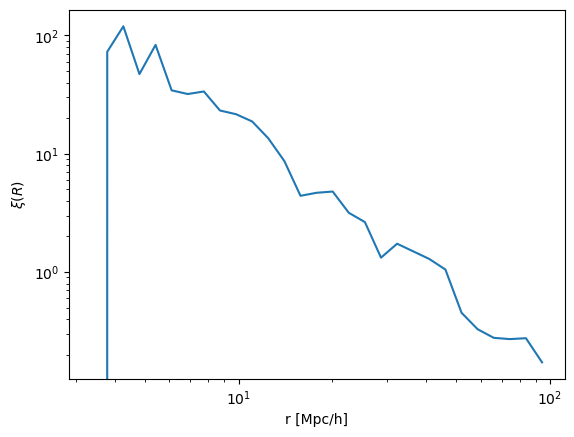

In [ ]:
r = 0.5*(r_bins[1:] + r_bins[:-1])

plt.loglog(r, tpcf)
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi(R)$')